-------
<h2> Table of Contents </h2>
    
<ol style= "color:brown;
            font-size:20px;">
    <li> Import Libraries</li>
    <li> Read Data</li>
    <li> Get some information about the data</li>
    <li> Data Cleaning</li>
    <li> Data Visualization & Getting Analysis </li>
    <li> Insights </li>

</ol>




----
## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

-----
## Read Data

In [2]:
df=pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

----
## Get some information about the data

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4339,4340,CA-2018-133501,27/08/2018,01/09/2018,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Franklin,Tennessee,37064.0,South,OFF-PA-10004888,Office Supplies,Paper,Xerox 217,5.184
3812,3813,CA-2018-147753,05/03/2018,05/03/2018,Same Day,PK-19075,Pete Kriz,Consumer,United States,Milwaukee,Wisconsin,53209.0,Central,OFF-LA-10003537,Office Supplies,Labels,Avery 515,25.060
4179,4180,US-2018-119039,06/03/2018,10/03/2018,Standard Class,BF-11170,Ben Ferrer,Home Office,United States,San Francisco,California,94109.0,West,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,14.976
6616,6617,CA-2017-123512,17/06/2017,19/06/2017,First Class,MV-18190,Mike Vittorini,Consumer,United States,Los Angeles,California,90045.0,West,OFF-LA-10000081,Office Supplies,Labels,Avery 496,22.500
8413,8414,CA-2017-147109,17/12/2017,21/12/2017,Standard Class,AH-10075,Adam Hart,Corporate,United States,Arlington,Texas,76017.0,Central,OFF-PA-10001972,Office Supplies,Paper,Xerox 214,51.840
4854,4855,CA-2015-113320,12/12/2015,15/12/2015,Second Class,LH-17155,Logan Haushalter,Consumer,United States,Oakland,California,94601.0,West,OFF-ST-10000617,Office Supplies,Storage,Woodgrain Magazine Files by Perma,8.940
1949,1950,CA-2018-157987,02/09/2018,06/09/2018,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,12.980
4649,4650,CA-2018-129357,14/05/2018,19/05/2018,Standard Class,KB-16585,Ken Black,Corporate,United States,Seattle,Washington,98103.0,West,OFF-SU-10004498,Office Supplies,Supplies,Martin-Yale Premier Letter Opener,64.400
7504,7505,CA-2017-158043,31/01/2017,04/02/2017,Second Class,JK-15325,Jason Klamczynski,Corporate,United States,Atlantic City,New Jersey,8401.0,East,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,23.360
2950,2951,CA-2018-134915,12/11/2018,12/11/2018,Same Day,EM-14140,Eugene Moren,Home Office,United States,Glendale,Arizona,85301.0,West,OFF-PA-10002160,Office Supplies,Paper,Xerox 1978,23.120


In [5]:
df.shape

(9800, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

----
## Data Cleaning

In [7]:
# Remove unnecassary Columns

df.drop(['Row ID','Order ID','Customer ID','Customer Name'],axis=1,inplace=True)

In [8]:
# Display the duplicated rows

df[df.duplicated()]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [9]:
# Remove Duplicates

df.drop_duplicates(inplace=True)

In [10]:
# get the number of nulls in each column

df.isna().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

<p style="color:red;
          font-size:20px;"> --> There are 11 Nulls in Postal Code Column </p>

In [11]:
# display the rows which have nulls

df[df.isnull().any(axis=1)]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
# Get the postal code of Vermont state from google -----> 05401 , and fill the nulls by it

df['Postal Code'].fillna(5401,inplace=True)

In [13]:
# Now there is no nulls

df.isna().sum().sum()

0

In [14]:
# Change the type of Order Date and Ship Date columns from object to date
# Change the type of Postal Code column from float to integer

df['Order Date']=pd.to_datetime(df['Order Date'],format="%d/%m/%Y")
df['Ship Date']=pd.to_datetime(df['Ship Date'],format="%d/%m/%Y")
df['Postal Code']=df['Postal Code'].astype('int')

## Data Visualization & Getting Analysis

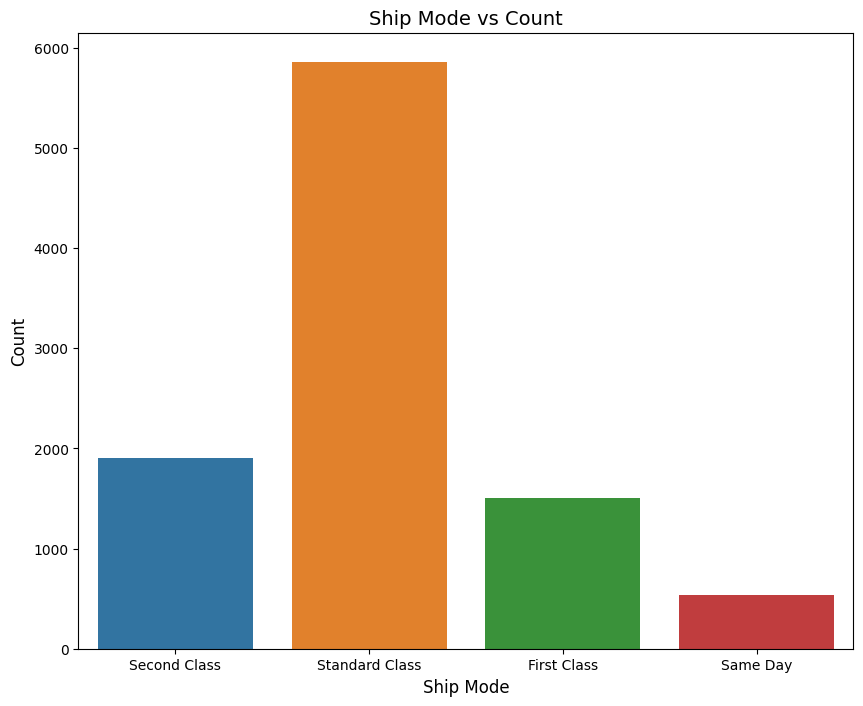

In [15]:
# Ship Mode vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=df['Ship Mode'])
plt.xlabel('Ship Mode',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Ship Mode vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Ship Mode of most of the Orders is Standard Class


In [16]:
# Segment vs Count

fig=px.pie(df,values=np.ones(9799),names='Segment',color_discrete_sequence=px.colors.sequential.RdBu,title='Segment')
fig.show()

### <font color='red'> Result </font>:  Most of the Orders are from Consumers


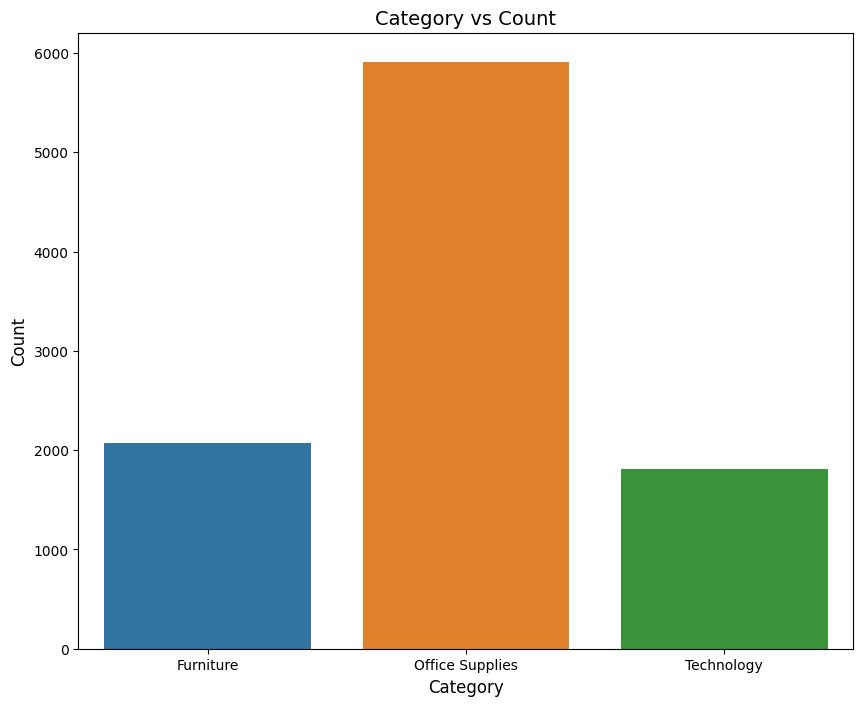

In [17]:
# Category vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=df['Category'])
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Category vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the Orders in Category are Office Supplies


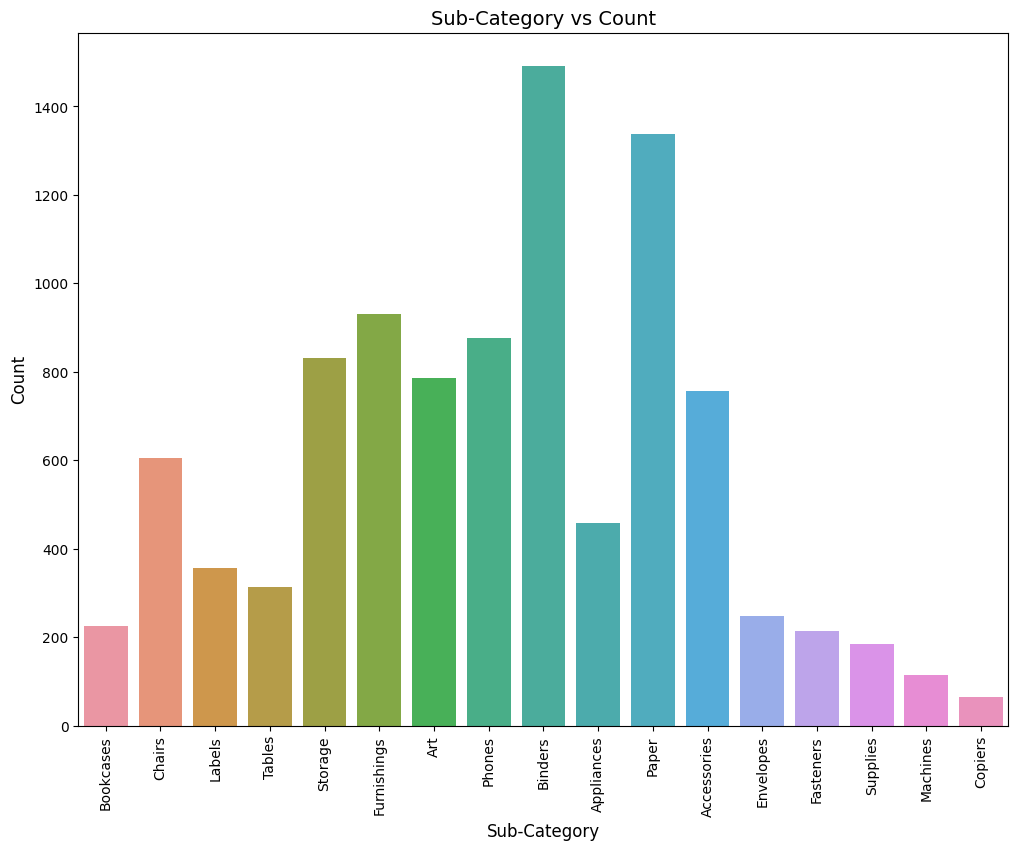

In [18]:
# Sub-Category vs Count

plt.figure(figsize=(12,9))
sns.countplot(x=df['Sub-Category'])
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Sub-Category vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

### <font color='red'> Result </font>: Most of the Orders in Sub_Category are Binders and Papers


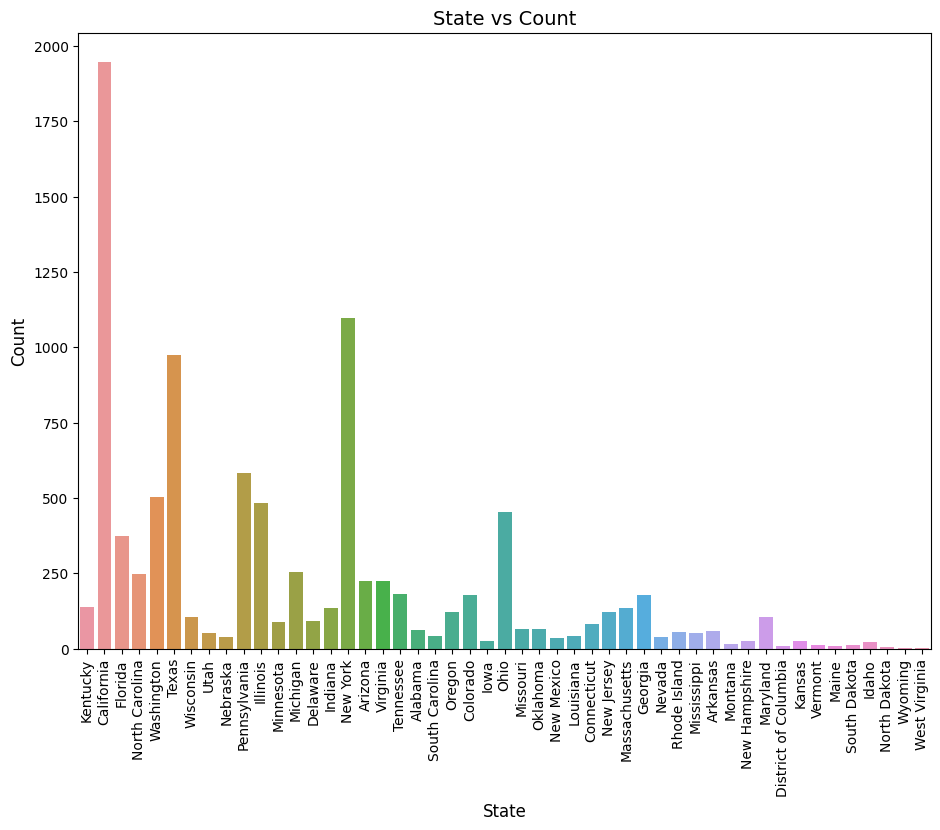

In [19]:
# State vs Count

plt.figure(figsize=(11,8))
sns.countplot(x=df['State'])
plt.xlabel('State',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('State vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

### <font color='red'> Result </font>: Most of the Orders are from California and New York States

In [20]:
# Sales of the Top 15 States 

top_states=df.groupby(['State']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,74848.98
9,Virginia,70636.72


In [21]:
# Top 15 States vs Sales

fig=px.bar(top_states,x='State',y='Sales',title='Top 15 States vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from California and New York States

In [22]:
# Sales of the Top 15 Cities 

top_cities=df.groupby(['City']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities                               
                               

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


In [23]:
# Top 15 Cities vs Sales

fig=px.bar(top_cities,x='City',y='Sales',title='Top 15 Cities vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from New York City and Los Angeles 

In [24]:
# Sales of the Categories

Categories=df.groupby('Category').sum('Sales').sort_values('Sales',ascending=False)
Categories=Categories[['Sales']].round(2)
Categories.reset_index(inplace=True)
Categories

,Category,Sales
0,Technology,827455.87
1,Furniture,728377.20
2,Office Supplies,705422.33


In [25]:
# Category vs Sales

fig=px.pie(Categories,names='Category',values='Sales',title='Category vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from Technology Products 

In [26]:
# Sales of the Segments

Segments= df.groupby("Segment").sum('Sales').sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)
Segments

,Segment,Sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424700.80


In [27]:
# Segment vs Sales

fig=px.pie(Segments,names='Segment',values='Sales',title='Segment vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from Consumers

In [28]:
# Sales of the Regions

Regions=df.groupby('Region').sum('Sales').sort_values('Sales',ascending=False)
Regions=Regions[['Sales']].round(2)
Regions.reset_index(inplace=True)
Regions

,Region,Sales
0,West,710219.68
1,East,669237.35
2,Central,492646.91
3,South,389151.46


In [29]:
# Region vs Sales

fig=px.pie(Regions,names='Region',values='Sales',title='Region vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from West Region

In [30]:
# Sales of Top 10 Products 

Products=df.groupby('Product Name').sum('Sales').sort_values('Sales',ascending=False).head(10)
Products=Products[['Sales']].round(2)
Products.reset_index(inplace=True)
Products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


### <font color='red'> Result </font>: The Canon imageCLASS 2200 Advanced Copier Product acheived the most Sales

-----
## <font color=red> Insights </font>
<ul style= "color:black;
            font-size:18px;">
    <li> Ship Mode of most of the Orders is Standard Class</li>
    <li> Most of the Orders are from Consumers</li>
    <li> Most of the Orders in Category are Office Supplies</li>
    <li> Most of the Orders in Sub-Category are Binders and Papers</li>
    <li>  Most of the Orders are from California and New York States</li>
    <li>   Most of the Sales are from California and New York States</li>
    <li> Most of the Sales are from New York City and Los Angeles </li>
    <li> Most of the Sales are from Technology Products </li>
    <li> Most of the Sales are from Consumers</li>
    <li> Most of the Sales are from West Region</li>
    <li> The Canon imageCLASS 2200 Advanced Copier Product acheived the most Sales</li>
</ul>